# Module 4: Modeling Data Using a Graph.

### Alanna Hazlett
### uwa6xv
#### September 25th, 2025
In this example we explore using NetworkX to build graphs based on related data. Below are some examples that illustrate how to build a graph using this package. 

Run these examples and confirm that you have NetworkX correctly installed. Then complete questions 1 - 4 below. 

It is recommended that you upload and run this notebook on [Colab](https://colab.research.google.com/)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)



In [3]:
# explicitly set positions 
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 36,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 5,
    "width": 5,
}


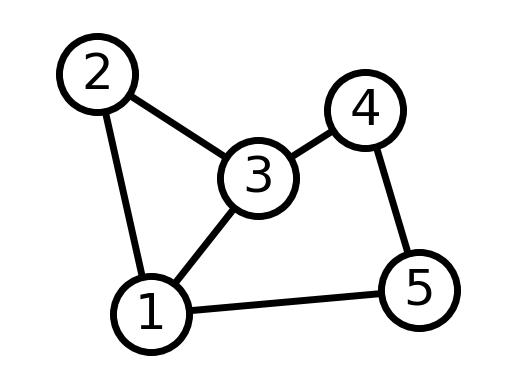

In [4]:
nx.draw_networkx(G, pos, **options)
# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

# Now try building a directed Graph 

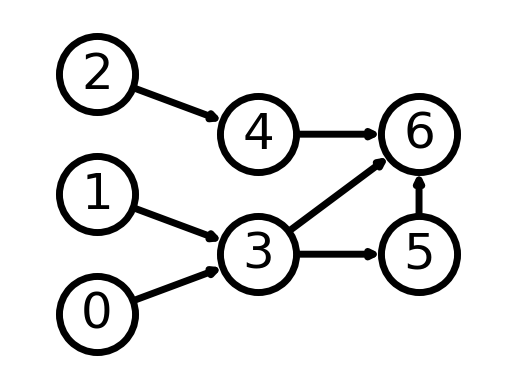

In [5]:
G = nx.DiGraph([(0, 3), (1, 3), (2, 4), (3, 5), (3, 6), (4, 6), (5, 6)])

# group nodes by column
left_nodes = [0, 1, 2]
middle_nodes = [3, 4]
right_nodes = [5, 6]

# set the position according to column (x-coord)
pos = {n: (0, i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, i + 0.5) for i, n in enumerate(right_nodes)})

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

**Modeling Twitter Network.**

In this exercise we will model and analyze example Twitter social network data. Assume we have information about a small network of Twitter users -- specifically who each user "follows". Thus we are modeling the "follows" relation using a graph. 

Using the following data table below complete the stated questions.


- Dan follows Jane, Bob, Sally, Sam, Tiana, Juan, and Wei
- Wei follows Dan, Bob, and Sam
- Bob follows Jane, Wei, and Tiana
- Tiana follows Jane and Juan
- Sally follows Bob
- Jane follows Jane and Wei
- Juan follows Sally and Jane 
- Sam follows Jane 

NOTE: If you have any questions about syntax or function names, search the docs. There is a search bar in the upper right of this page:

https://networkx.org/documentation/stable/reference/index.html







## Question 1.

Would you use a undirected graph or a directed graph to model this data? Explain.

> I would use a directed graph, because the relationship is directional. For example Juan follows Sally, but Sally does not follow Juan.  

## Question 2.

Create this graph using NetworkX and plot the resulting graph. 

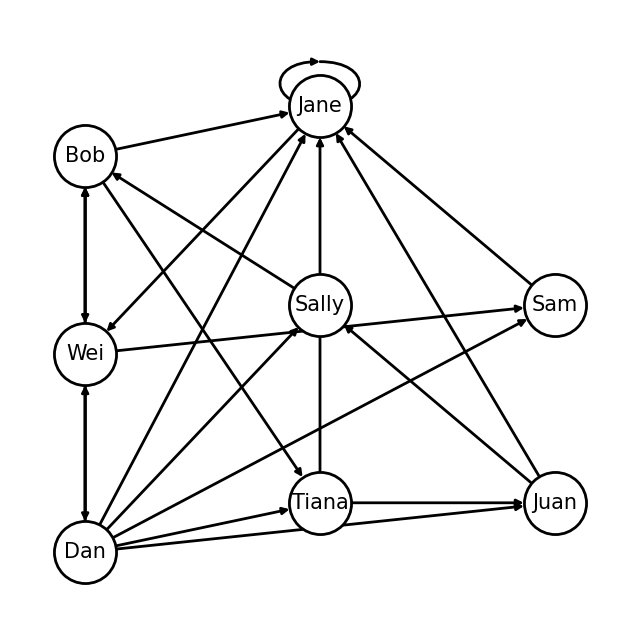

In [37]:
G_twitter = nx.DiGraph([('Dan', 'Jane'),('Dan', 'Bob'), ('Dan', 'Sally'),
                        ('Dan', 'Sam'), ('Dan', 'Tiana'), ('Dan', 'Juan'),
                        ('Dan', 'Wei'), 
                        ('Wei', 'Dan'), ('Wei', 'Bob'), ('Wei', 'Sam'),
                        ('Bob', 'Jane'), ('Bob', 'Wei'), ('Bob', 'Tiana'),
                        ('Tiana', 'Jane'), ('Tiana', 'Juan'),
                        ('Sally', 'Bob'),
                        ('Jane', 'Jane'), ('Jane', 'Wei'),
                        ('Juan', 'Sally'), ('Juan', 'Jane'),
                        ('Sam', 'Jane')])

# group nodes by column
left_nodes = ['Dan', 'Wei', 'Bob']
middle_nodes = ['Tiana', 'Sally', 'Jane']
right_nodes = ['Juan', 'Sam']

# set the position according to column (x-coord)
pos = {n: (0, 2*i) for i, n in enumerate(left_nodes)}
pos.update({n: (1, 2*i + 0.5) for i, n in enumerate(middle_nodes)})
pos.update({n: (2, 2*i + 0.5) for i, n in enumerate(right_nodes)})

options = {
    "font_size": 15,
    "node_size": 2000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}
plt.figure(figsize = (8,8)) #This needs to be before the draw_networkx
nx.draw_networkx(G_twitter, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")
plt.show()

## Question 3.

Assume you wanted to determine which user was the biggest "social influencer". Which graph measure would you compute and why? 

> Node degree, as it is a measure of how connected the node is to others and when compared to others we are looking for the node with the highest node degree to display that it is the most connected node in the network.
>
> Betweeness centrality also helps us determine who is the biggest social influencer, because it measures how much a vertex (edge) lies on the paths between other vertices (edges). This means that this measure in this case when looking at the vertices corresponding to a specific node if they have the highest values of the network it means they have the most control over information spreading among the group/network. 

## Question 4.

Compute the measure chosen and determine who in this example was the biggest social influencer. See example below which analyzes facebook social network data. You will need to have data file facebook_combined.txt to complete this example.

In [7]:
# Read in graph data from facebook data txt file. 
G_fb = nx.read_edgelist("Module 4 - HW - Facebook Combined.txt", create_using = nx.Graph(), nodetype=int)
print(G_fb)

Graph with 4039 nodes and 88234 edges


(-1.0303403913974762,
 1.192928272485733,
 -0.8477265998721123,
 0.7872961327433586)

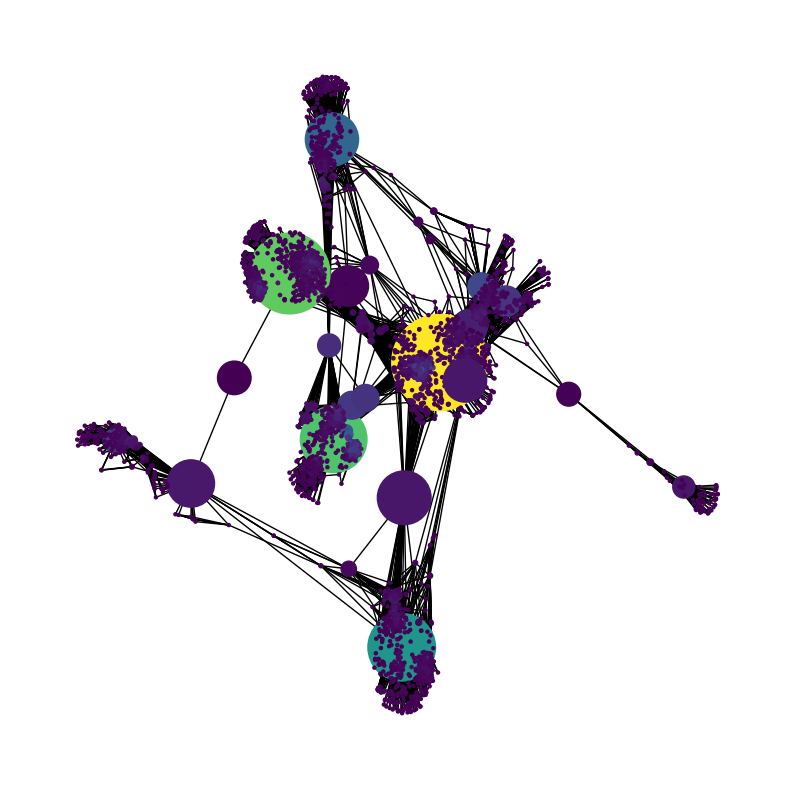

In [8]:
# Compute measures of centrality and degree for the nodes. These attributes can 
# be used to help analyze the graph. Then the graph is plotted and color and size
# of the nodes are used to indicate size and betweeness, respectively. (Note: This
# is a large data set and may take 5+ minutes to run.)

pos = nx.spring_layout(G_fb)
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

#### Nodes with the highest betweeness for the example

In [9]:
# Identify the top 5 nodes with highest betweeness measures. 
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]

### My Answer

In [10]:
print(G_twitter)

DiGraph with 8 nodes and 21 edges


(-1.1832600375254279,
 0.9285937282437893,
 -0.7560953696599172,
 0.6435944076714954)

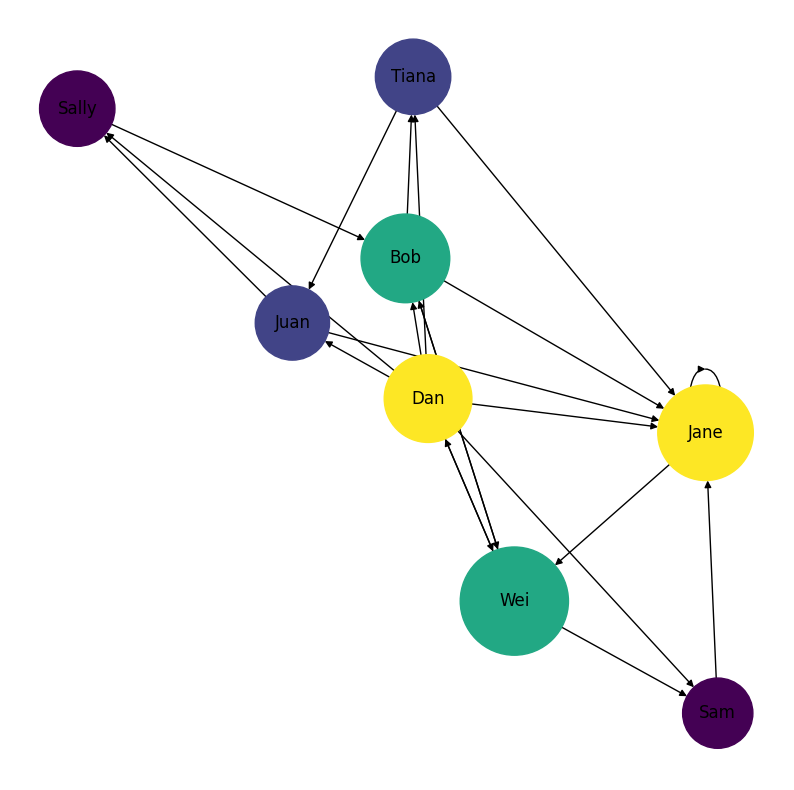

In [11]:
pos = nx.spring_layout(G_twitter)
betCent_twitter = nx.betweenness_centrality(G_twitter, normalized=True, endpoints=True)
node_color = [20000.0 * G_twitter.degree(v) for v in G_twitter]
node_size =  [v * 10000 for v in betCent_twitter.values()]
plt.figure(figsize=(10,10))
nx.draw_networkx(G_twitter, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

In [19]:
#Identifying person with highest node degree aka person with most connections to other nodes/people
people = ['Dan','Wei','Bob','Tiana','Sally','Jane','Juan','Sam']
lens_list = []
for person in people:
    persons_list = [n for n in G_twitter.neighbors(person)]
    print(person, '-', persons_list)
    lens_list.append(len(persons_list))


combo = list(zip(people, lens_list))                                         
sorted_combo = sorted(combo, reverse = True, key=lambda x: x[1])
sorted_combo
    
print("The person with the highest node degree is", sorted_combo[0][0], "with", sorted_combo[0][1], "connections.")

Dan - ['Jane', 'Bob', 'Sally', 'Sam', 'Tiana', 'Juan', 'Wei']
Wei - ['Dan', 'Bob', 'Sam']
Bob - ['Jane', 'Wei', 'Tiana']
Tiana - ['Jane', 'Juan']
Sally - ['Bob']
Jane - ['Jane', 'Wei']
Juan - ['Sally', 'Jane']
Sam - ['Jane']
The person with the highest node degree is Dan with 7 connections.


In [12]:
# Identify the top 5 nodes with highest betweeness measures. 
sorted(betCent_twitter, key=betCent_twitter.get, reverse=True)[:5]

['Wei', 'Jane', 'Bob', 'Dan', 'Sally']

<div class="alert alert-block alert-info">
<b>I pledge that I have neither given nor received help on this assignment. : Alanna Hazlett </b>
</div>